#복습 과제

## **Problem 1**

### 1) Sequential data의 특성에 기초해 RNN 모델의 구조와 작동방식, inductive bias에 대해 설명하시오. 

- 같은 model에 동일한 weight를 반복해서 주며, Sequentiality하게 inductive bias를 받음

### 2) Sequence classification 문제에 있어 CNN 대신 RNN을 사용할 경우 얻을 수 있는 장점에 대해 기술하시오.

- input size가 고정 되어있는 CNN 과는 달리 input size가 고정 되어있지않아 유연하게 구조를 만들 수 있음

### 3) Sequence prediction 문제에 있어 RNN을 사용함으로써 얻을 수 있는 장점과 적용방법에 대해 설명하시오. 

- 이전 상태에 대한 정보를 저장하고 있어 Sequencitial한 정보에 강력함
-

### 4) RNN에서 모든 hidden state에 대해 동일한 weight를 사용함으로써 얻을 수 있는 이점이 무엇인지 설명하시오.

- 동잃란 weight를 사용함으로써 위치에 상관없이 모두 같은 parameter를 같게 됨 => input size, output size에 구애받지 않음

### 5) RNN 모델의 한계에 대해 설명하고 LSTM이 RNN에 비해 장기의존성 문제 해결에 유리한 이유에 대해 설명하시오.

- Backpropagation 진행됨에 따라 vanishing/exploding gradient 문제가 발생함 
=> LSTM에서 Cell state : 우회가 가능한 고속도로 개념을 통해 장기의존성 문제를 해결할 수 있음 
    - 왜 우회가 가능한 고속도로인지? - 3개의 gate 추가함으로 정보를 요리할 수 있음
    - 3개의 게이트
        - Forget gate : 정보를 버릴지 말지 결정 (수문 개념)
        - Input gate : 새로운 정보를 업데이트 말지 결정
        - Output gate : 입력된 정보를 내보낼지 말지 결정

## **Problem 2**

### 1) 아래 그림을 참고하여 각 problem type의 특징을 구체적인 예시를 통해 설명하시오. (강의 슬라이드에 언급된 예시 외에 다양한 예시를 찾아보고 해당 예시에서 구체적으로 주어진 task 및 input/output의 형태가 어떻게 다른지 설명할 것)

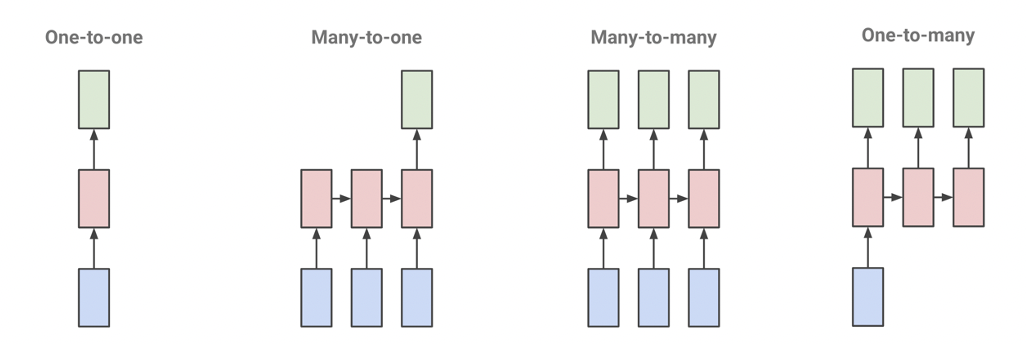

- One-to-one : Vanilla Neural Network로 불리며 단일 입력 후 단일 출력하는 기본 구조입니다

- Many-to-one : 여러 개의 입력, 시퀀스를 통해 하나를 출력하는 구조입니다.
예를 들면 여러 날 평균 기온의 시퀀스를 기반으로 다음 날 평균 기온을 예측하고자 할때 사용합니다.

- Many-to-many : 시퀀스 벡터를 받는 즉시 시퀀스 벡터를 출력하는 구조입니다.
비디오를 입력받아 이를 설명하는 문장을 만들어내는 Video Captioning에 사용됩니다

- One-to-many : 1개의 벡트를 받아 시퀀스 벡터를 출력하는 구조입니다.
이미지를 입력받아 이를 설명하는 문장을 만들어내는 Image Captioning에 사용됩니다

### 2) 아래 그림에서 $f_t$, $i_t$, $o_t$, $c_t$, $h_t$ 각각의 의미와 역할에 대해 서술하시오. 

- f_t : forget gate로 c_t에서 어떤 정보를 버릴지 말지 결정하는 역할

- i_t : input gate로 c_t에 새로운 정보를 업데이트 할지 말지 결정

- o_t : c_t에 입력된 정보를 어느정도로 출력할지 결정

- c_t : cell state로 정보끼리의 고속도로...?

- h_t : o_t로 나온 정보를 얼마나 출력할지

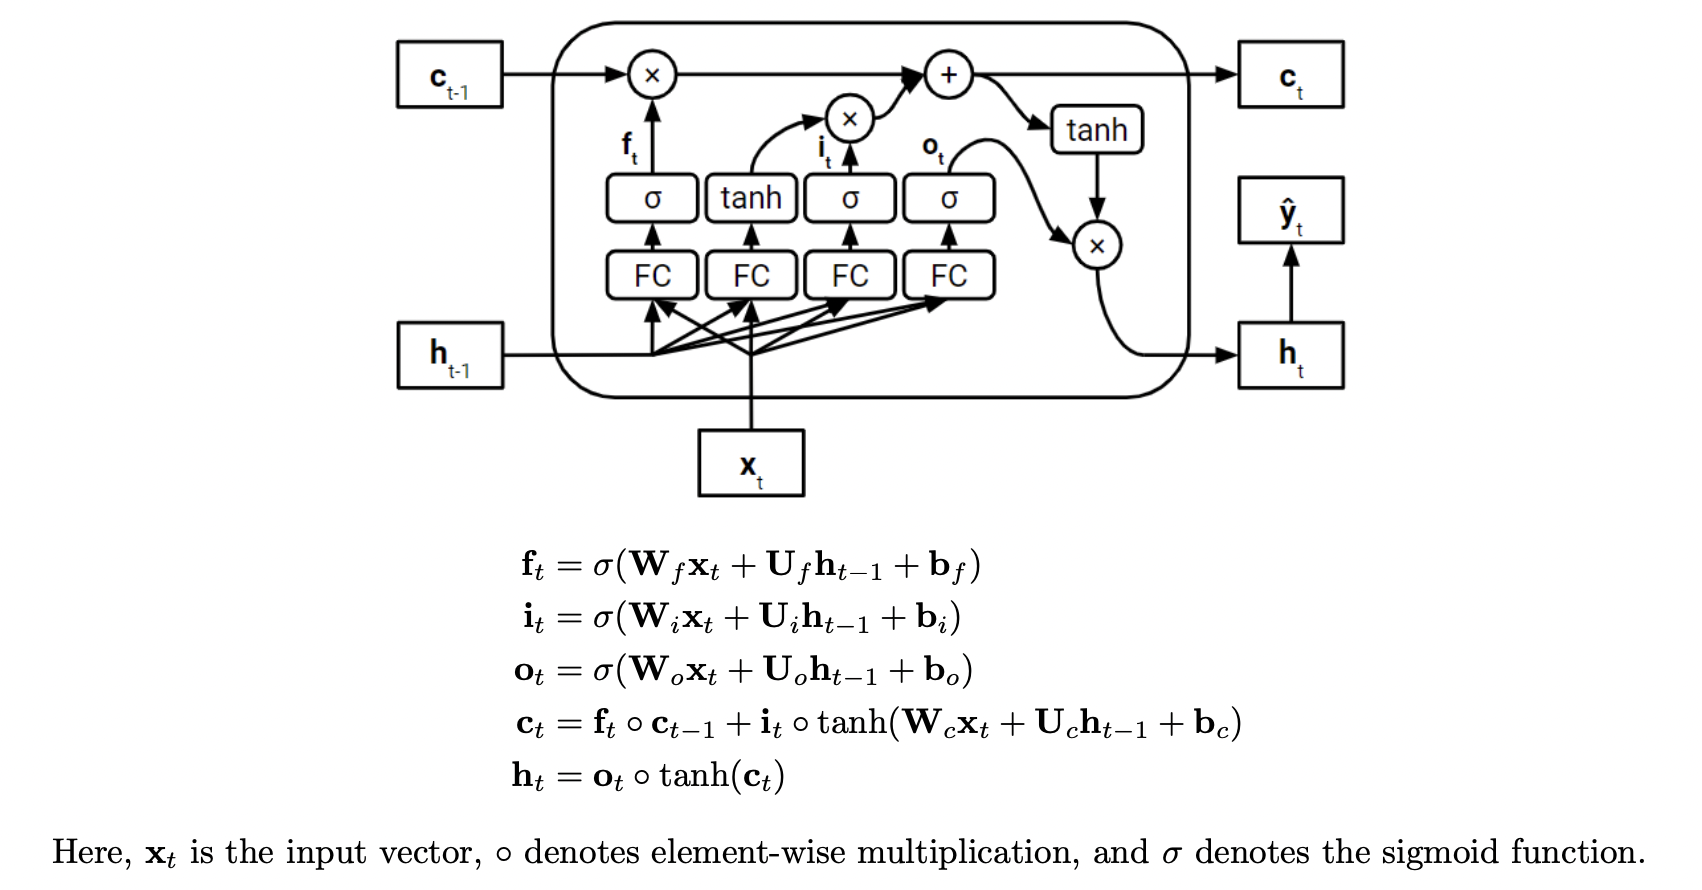

.

.

.

#실습 과제

## Exercise 1. 아래의 그림 및 수식을 바탕으로 RNN 코드를 완성하시오.

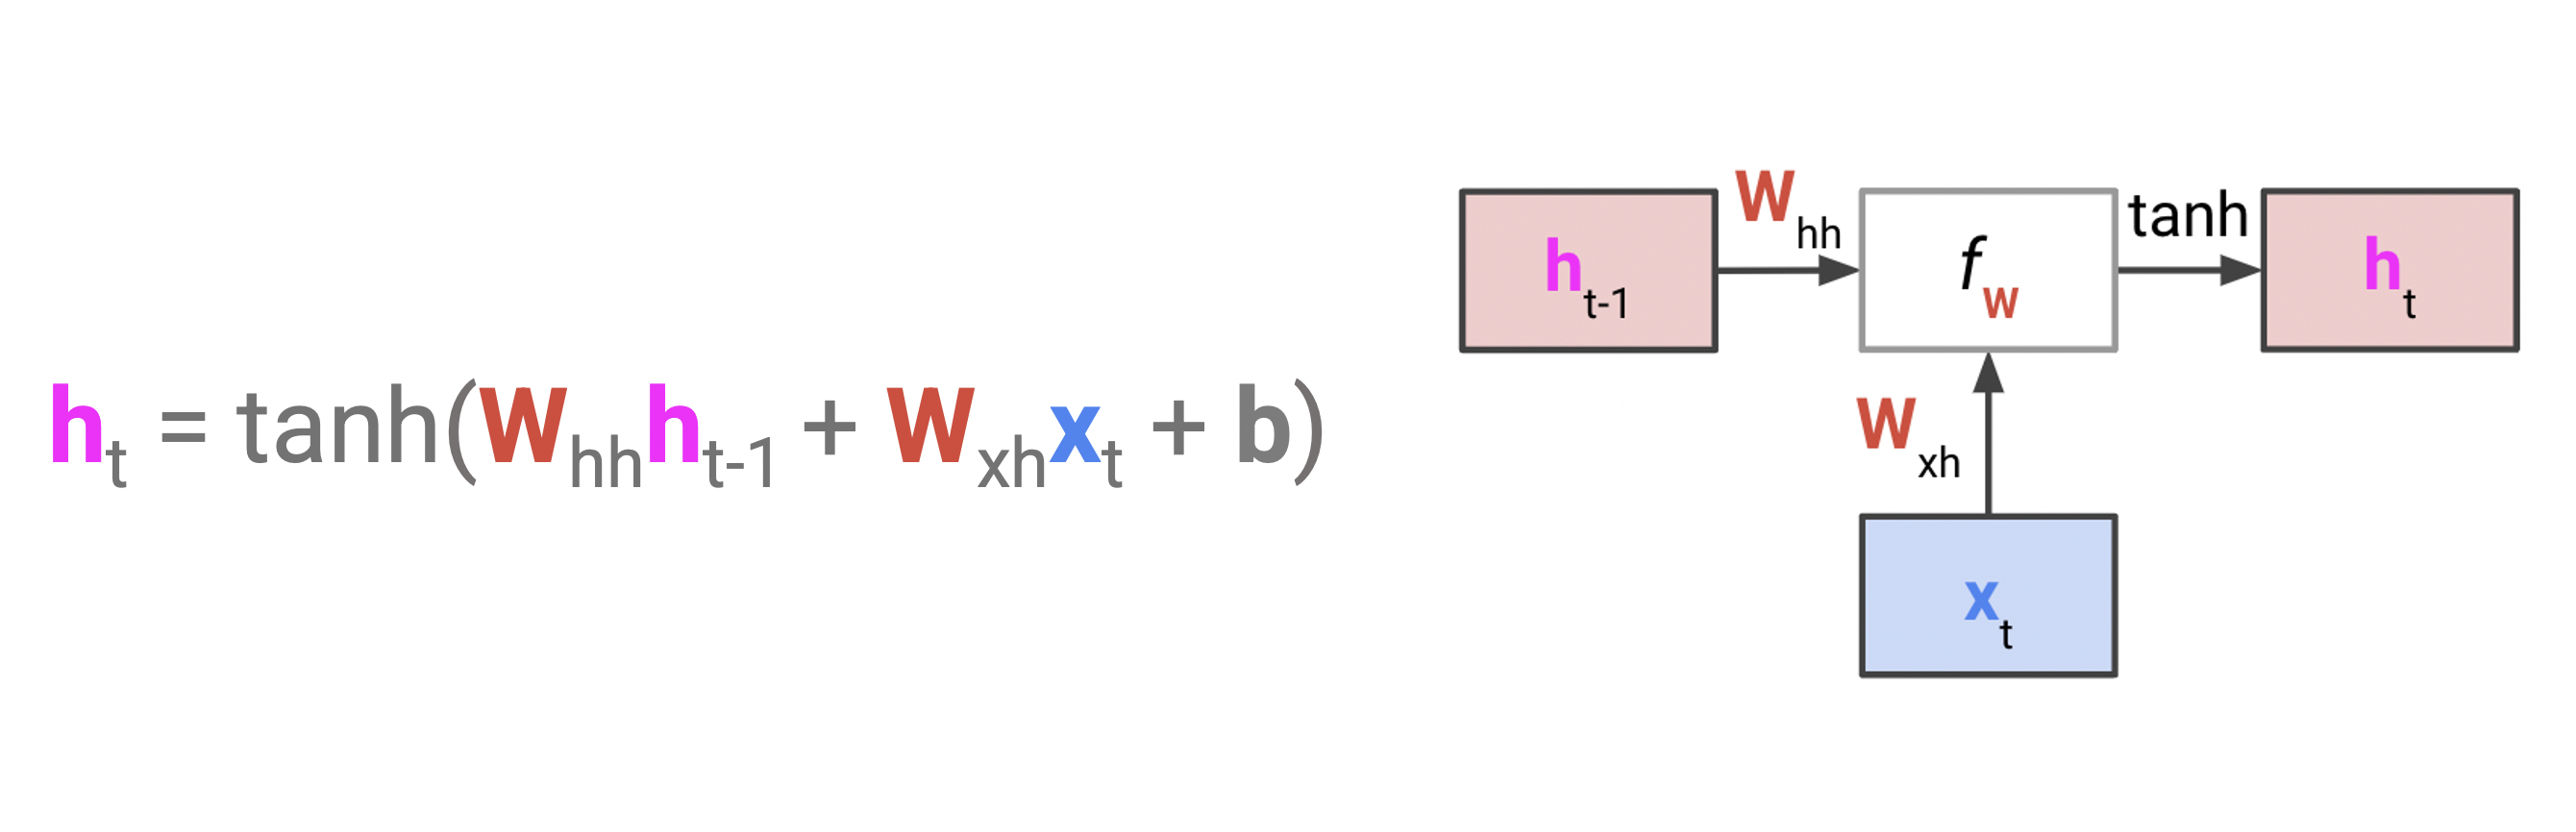

In [ ]:
import torch
import torch.nn as nn
import math

class RNN(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int):
        super().__init__()

        self.input_dim = input_dim
        self.hidden_dim = hidden_dim

        self.Wxh = nn.Parameter(torch.Tensor(input_dim, hidden_dim))
        self.Whh = nn.Parameter(torch.Tensor(hidden_dim, hidden_dim))
        self.b = nn.Parameter(torch.Tensor(hidden_dim))
 
        self.init_weights()

    
    def init_weights(self):
            stdv = 1.0 / math.sqrt(self.hidden_dim)
            for weight in self.parameters():
                weight.data.uniform_(-stdv, stdv)

    def forward(self, x, init_states=None):

        """
        x.shape = (batch_dim, sequence_dim, input_dim)
        """
        bs, seq_dim, _ = x.size()
        hidden_seq = []

        if init_states is None:
            h_t = torch.zeros(bs, self.hidden_dim).to(x.device)
        else:
            h_t = init_states

        for t in range(seq_dim):
            x_t = x[:, t, :]

            ### Complete here ###
            h_t = torch.tanh(h_t @ self.Whh + x_t @ self.Wxh + self.b)
            ### Complete here ###

            hidden_seq.append(h_t.unsqueeze(0))
        
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, h_t

model = RNN(10, 30)
hidden_seq, h_t = model(torch.zeros(1,50,10))
print(hidden_seq.size())
print(h_t.size())
# 모델이 잘 완성되었을 경우 
# (out1): torch.Size([1, 50, 30])
# (out2): torch.Size([1, 30])

torch.Size([1, 50, 30])
torch.Size([1, 30])


## Exercise 2. 아래의 그림 및 수식을 바탕으로 LSTM 코드를 완성하시오.

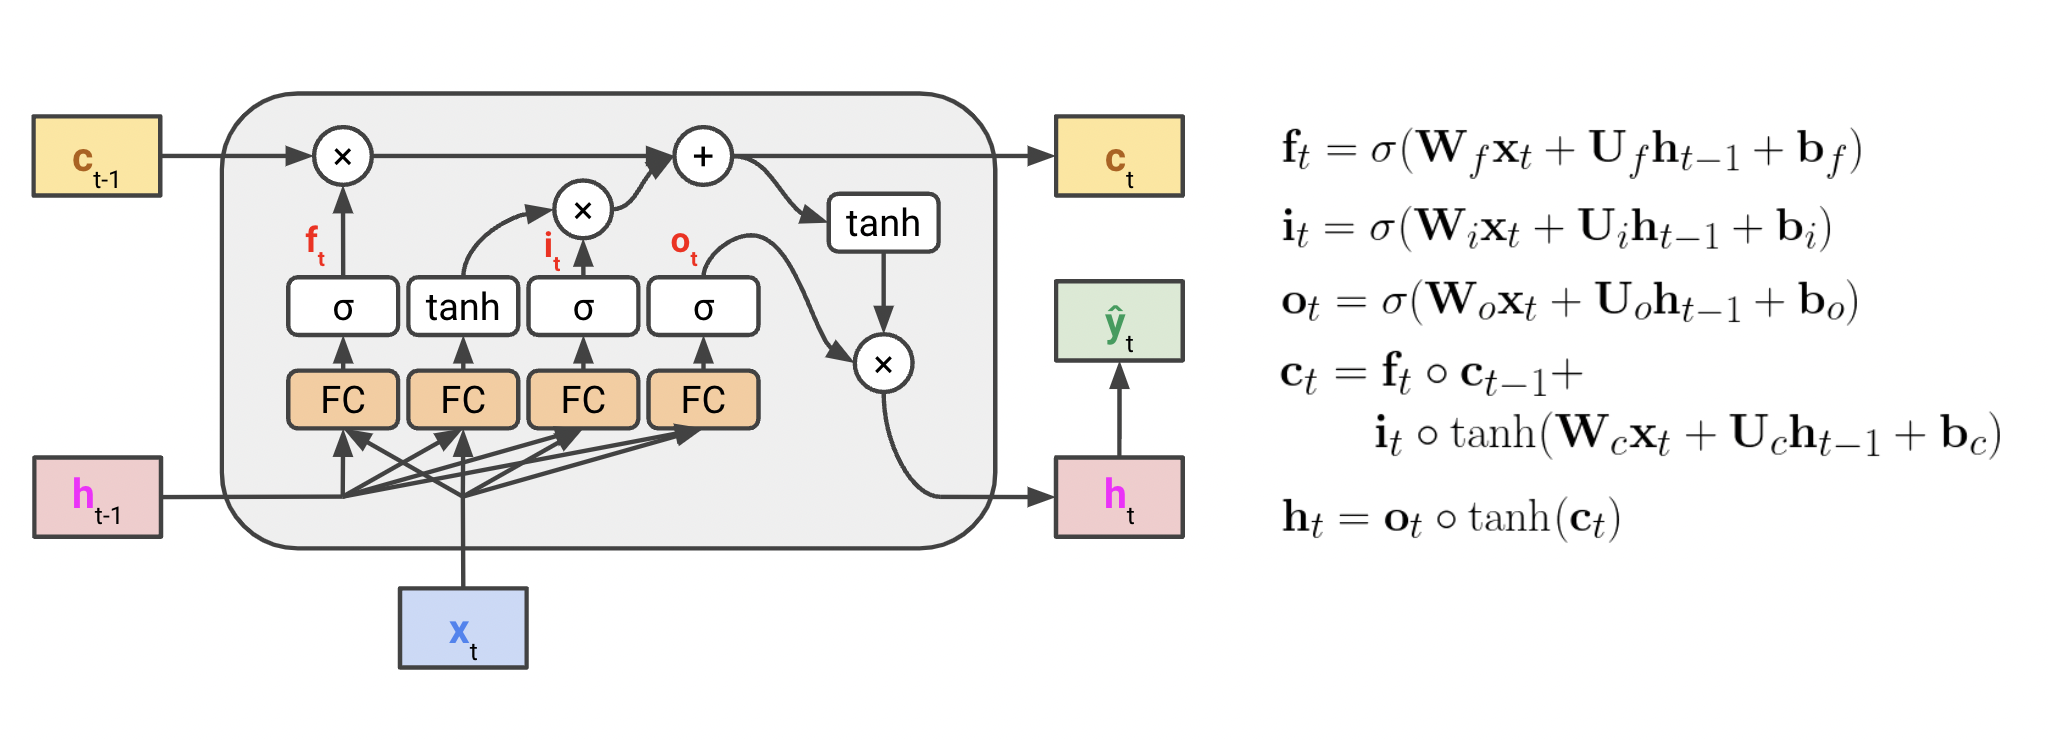

In [ ]:
import math
import torch
import torch.nn as nn

class LSTM(nn.Module):
    def __init__(self, input_dim: int, hidden_dim: int):
        super().__init__()
        self.input_dim = input_dim
        self.hidden_dim = hidden_dim
        
        #i_t
        self.W_i = nn.Parameter(torch.Tensor(input_dim, hidden_dim))
        self.U_i = nn.Parameter(torch.Tensor(hidden_dim, hidden_dim))
        self.b_i = nn.Parameter(torch.Tensor(hidden_dim))
        
        #f_t
        self.W_f = nn.Parameter(torch.Tensor(input_dim, hidden_dim))
        self.U_f = nn.Parameter(torch.Tensor(hidden_dim, hidden_dim))
        self.b_f = nn.Parameter(torch.Tensor(hidden_dim))
        
        #c_t
        self.W_c = nn.Parameter(torch.Tensor(input_dim, hidden_dim))
        self.U_c = nn.Parameter(torch.Tensor(hidden_dim, hidden_dim))
        self.b_c = nn.Parameter(torch.Tensor(hidden_dim))
        
        #o_t
        self.W_o = nn.Parameter(torch.Tensor(input_dim, hidden_dim))
        self.U_o = nn.Parameter(torch.Tensor(hidden_dim, hidden_dim))
        self.b_o = nn.Parameter(torch.Tensor(hidden_dim))
        
        self.init_weights()

    
    def init_weights(self):
            stdv = 1.0 / math.sqrt(self.hidden_dim)
            for weight in self.parameters():
                weight.data.uniform_(-stdv, stdv)

    def forward(self, x, init_states=None):
        
        """
        x.shape = (batch_dim, sequence_dim, input_dim)
        """
        bs, seq_dim, _ = x.size()
        hidden_seq = []
        
        if init_states is None:
            h_t, c_t = (
                torch.zeros(bs, self.hidden_dim).to(x.device),
                torch.zeros(bs, self.hidden_dim).to(x.device),
            )
        else:
            h_t, c_t = init_states
            
            
        for t in range(seq_dim):
            x_t = x[:, t, :]
            f_t = torch.sigmoid(x_t @ self.W_f + h_t @ self.U_f + self.b_f)
            
            ### Complete here ###
            i_t = torch.sigmoid(x_t @ self.W_i + h_t @ self.U_i + self.b_i)
            o_t = torch.sigmoid(x_t @ self.W_o + h_t @ self.U_o + self.b_o)
            c_t = f_t * c_t + i_t * torch.tanh(x_t @ self.W_c + h_t @ self.U_c + self.b_c)
            ### Complete here ###

            h_t = o_t * torch.tanh(c_t)
            
            hidden_seq.append(h_t.unsqueeze(0))
        
        hidden_seq = torch.cat(hidden_seq, dim=0)
        hidden_seq = hidden_seq.transpose(0, 1).contiguous()
        return hidden_seq, (h_t, c_t)

model = LSTM(10, 30)
hidden_seq, (h_t, c_t) = model(torch.zeros(1,50,10))
print(hidden_seq.size())
print(h_t.size())
print(c_t.size())
# 모델이 잘 완성되었을 경우 
# (out1): torch.Size([1, 50, 30])
# (out2): torch.Size([1, 30])
# (out3): torch.Size([1, 30])

torch.Size([1, 50, 30])
torch.Size([1, 30])
torch.Size([1, 30])
